In [1]:
!pip install mlflow dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.2/252.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.1/575.1 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

# Text classification (multiclass)

### Tutorial for beginners in text classification analysis using Python

__Data__: Consumer complaints received about financial products and services<br>
__Data source:__ Public dataset downloaded from
https://catalog.data.gov/dataset/consumer-complaint-database
on 2019, May 13.

These are real world complaints received about financial products and services. Each complaint has been labeled with a specific product; therefore, this is a supervised text classification problem. With the aim to classify future complaints based on its content, we used different machine learning algorithms can make more accurate predictions (i.e., classify the complaint in one of the product categories).

# Table of Content

* [Goal](#obj)
* [Importing packages and loading data](#imp)
* [Exploratory Data Analysis (EDA) and Feature Engineering](#eda)
* [Text Preprocessing](#pre)
* [Multi-Classification models](#ml)
    * [Spliting the data: train and test](#sp)
    * [Models](#m)
* [Comparison of model performance](#sum)
* [Model Evaluation](#ev)
    * [Precision, Recall, F1-score](#f1)
    * [Confusion Matrix](#cm)
* [Predictions](#pred)

<a id='obj'></a>
## Goal:<br>
Classify consumer complaints into predefined categories.<br><br>
Classification algorithms: Linear Support Vector Machine (LinearSVM), Random Forest, Multinomial Naive Bayes and Logistic Regression.<br><br>
Note: Text classification is an example of supervised machine learning since we train the model with labelled data (complaints about and specific finance product is used for train a classifier.

<a id='imp'></a>
## Importing packages and loading data

In [2]:
# Input data files are available in the "../input/" directory.
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Install Kaggle
!pip install kaggle

# Download the dataset
!kaggle datasets download -d selener/consumer-complaint-database

# Unzip the downloaded file
!unzip consumer-complaint-database.zip

Dataset URL: https://www.kaggle.com/datasets/selener/consumer-complaint-database
License(s): U.S. Government Works
 94% 165M/176M [00:01<00:00, 103MB/s]
100% 176M/176M [00:01<00:00, 96.1MB/s]
Archive:  consumer-complaint-database.zip
  inflating: rows.csv                


In [4]:
# loading data
df = pd.read_csv('/content/rows.csv')
df.shape

<ipython-input-4-d074c2f8731c>:2: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/rows.csv')


(1282355, 18)

We have more than 1 million instances (rows) and 18 features (columns).

<a id='eda'></a>
## Exploratory Data Analysis (EDA) and Feature Engineering

In [5]:
df.head(2).T # Columns are shown in rows for easy reading

,0,1
Date received,05/10/2019,05/10/2019
Product,Checking or savings account,Checking or savings account
Sub-product,Checking account,Other banking product or service
Issue,Managing an account,Managing an account
Sub-issue,Problem using a debit or ATM card,Deposits and withdrawals
Consumer complaint narrative,NaN,NaN
Company public response,NaN,NaN
Company,NAVY FEDERAL CREDIT UNION,BOEING EMPLOYEES CREDIT UNION
State,FL,WA
ZIP code,328XX,98204


The dataset contains features that are not necessary to solve our multi-classification problem. For this text classification problem, we are going to build another dataframe that contains ‘Product’ and ‘Consumer complaint narrative’ (renamed as 'Consumer_complaint').

In [6]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint']

df1.shape

(383564, 2)

In [7]:
# Percentage of complaints with text
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

29.9

From more than 1 million complaints, there are about 380,000 cases with text (~ 30% of the original dataset is not null). This is still a good number to work with. Now let's have a look at the categories we want to classify each complaint.

In [8]:
pd.DataFrame(df.Product.unique()).values

array([['Checking or savings account'],
       ['Debt collection'],
       ['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Mortgage'],
       ['Student loan'],
       ['Vehicle loan or lease'],
       ['Credit card or prepaid card'],
       ['Payday loan, title loan, or personal loan'],
       ['Money transfer, virtual currency, or money service'],
       ['Credit reporting'],
       ['Credit card'],
       ['Bank account or service'],
       ['Consumer Loan'],
       ['Prepaid card'],
       ['Other financial service'],
       ['Payday loan'],
       ['Money transfers'],
       ['Virtual currency']], dtype=object)

There are 18 different classes or categories (target). However; it is observed that some classes are contained in others. For instance, ‘Credit card’ and ‘Prepaid card’ are contained in ‘Credit card or prepaid card’ category. Now, imagine there is a new complaint about Credit card and we want to classify it. The algorithm can either classify this complaint as 'Credit card' or 'Credit card or prepaid' and it would be correct. Nevertheless, this would affect model performance. In order to avoid this problem, the names of some categories were renamed.

In [9]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
df2 = df1.sample(10000, random_state=1).copy()

In [10]:
# Renaming categories
df2.replace({'Product':
             {'Credit reporting, credit repair services, or other personal consumer reports':
              'Credit reporting, repair, or other',
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}},
            inplace= True)

In [11]:
pd.DataFrame(df2.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Debt collection
2,Consumer Loan
3,Credit card or prepaid card
4,Mortgage
5,Vehicle loan or lease
6,Student loan
7,"Payday loan, title loan, or personal loan"
8,Checking or savings account
9,Bank account or service


The number of classes were reduced from 18 to 13. <br><br>Now we need to represent each class as a number, so as our predictive model can better understand the different categories.

In [12]:
# Create a new column 'category_id' with encoded categories
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df2.head()

,Product,Consumer_complaint,category_id
310399,"Credit reporting, repair, or other",Bayview completely ignored laws and is reporti...,0
186155,"Credit reporting, repair, or other",inaccurate information no knowledge of account...,0
651135,Debt collection,On XXXX/XXXX/2016 I received a notice from Con...,1
515233,Consumer Loan,I have a loan with Kia Motor Finance. I rece...,2
641112,Credit card or prepaid card,I have a XXXX BIG card and made my payment whe...,3


The bar chart below shows the number of complaints per category. It can be observed that The bar chart below shows the number of complaints per category. It can be observed that most of customer complaints are due to:
* credit reporting, credit repair
* debt collection
* mortgage

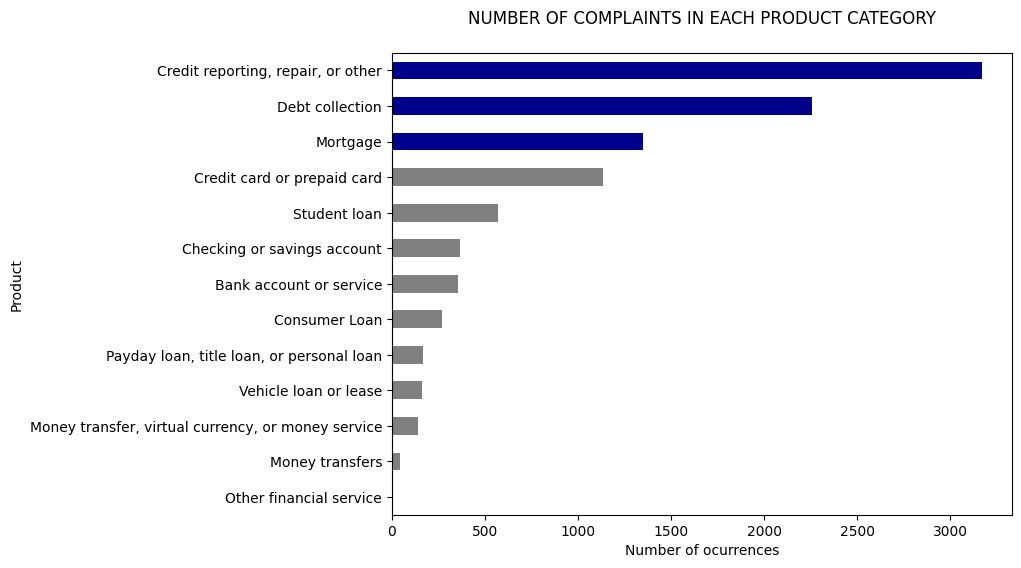

In [13]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

As we can see here, we have umbalanced dataset, which will impact the model's training on different classes.

<a id='pre'></a>
## Text Preprocessing

The text needs to be transformed to vectors so as the algorithms will be able make predictions. In this case it will be used the Term Frequency – Inverse Document Frequency (TFIDF) weight to evaluate __how important a word is to a document in a collection of documents__.

After removing __punctuation__ and __lower casing__ the words, importance of a word is determined in terms of its frequency.

### “Term Frequency – Inverse Document Frequency

__TF-IDF__ is the product of the __TF__ and __IDF__ scores of the term.<br><br> $$\text{TF-IDF}=\frac{\text{TF}}{\text{IDF}}$$<br>

__Term Frequency :__ This summarizes how often a given word appears within a document.

$$\text{TF} = \frac{\text{Number of times the term appears in the doc}}{\text{Total number of words in the doc}}$$<br><br>
__Inverse Document Frequency:__ This downscales words that appear a lot across documents. A term has a high IDF score if it appears in a few documents. Conversely, if the term is very common among documents (i.e., “the”, “a”, “is”), the term would have a low IDF score.<br>

$$\text{IDF} = \ln\left(\frac{\text{Number of docs}}{\text{Number docs the term appears in}} \right)$$<br>

TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The higher the TFIDF score, the rarer the term is. For instance, in a Mortgage complaint the word _mortgage_ would be mentioned fairly often. However, if we look at other complaints, _mortgage_ probably would not show up in many of them. We can infer that _mortgage_ is most probably an important word in Mortgage complaints as compared to the other products. Therefore, _mortgage_ would have a high TF-IDF score for Mortgage complaints.

TfidfVectorizer class can be initialized with the following parameters:
* __min_df__: remove the words from the vocabulary which have occurred in less than ‘min_df’ number of files.
* __max_df__: remove the words from the vocabulary which have occurred in more than _‘max_df’ * total number of files in corpus_.
* __sublinear_tf__: set to True to scale the term frequency in logarithmic scale.
* __stop_words__: remove the predefined stop words in 'english'.
* __use_idf__: weight factor must use inverse document frequency.
* __ngram_range__: (1, 2) to indicate that unigrams and bigrams will be considered.

In [14]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 27507 features (TF-IDF score of unigrams and bigrams)


In [15]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
# Replace get_feature_names with get_feature_names_out
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Bank account or service:
  * Most Correlated Unigrams are: overdraft, bank, scottrade
  * Most Correlated Bigrams are: citigold checking, debit card, checking account

==> Checking or savings account:
  * Most Correlated Unigrams are: checking, branch, overdraft
  * Most Correlated Bigrams are: 00 bonus, overdraft fees, checking account

==> Consumer Loan:
  * Most Correlated Unigrams are: dealership, vehicle, car
  * Most Correlated Bigrams are: car loan, vehicle loan, regional acceptance

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: express, citi, card
  * Most Correlated Bigrams are: balance transfer, american express, credit card

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: report, experian, equifax
  * Most Correlated Bigrams are: credit file, equifax xxxx, credit report

==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: debt collector, collect debt, collection 

<a id='sp'></a>
### Spliting the data into train and test sets
The original data was divided into features (X) and target (y), which were then splitted into train (75%) and test (25%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

<a id='ml'></a>
## Multi-Classification models

The classification models evaluated are:
* Random Forest
* Linear Support Vector Machine
* Multinomial Naive Bayes
* Logistic Regression.

In [16]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 0)

# SMOTE

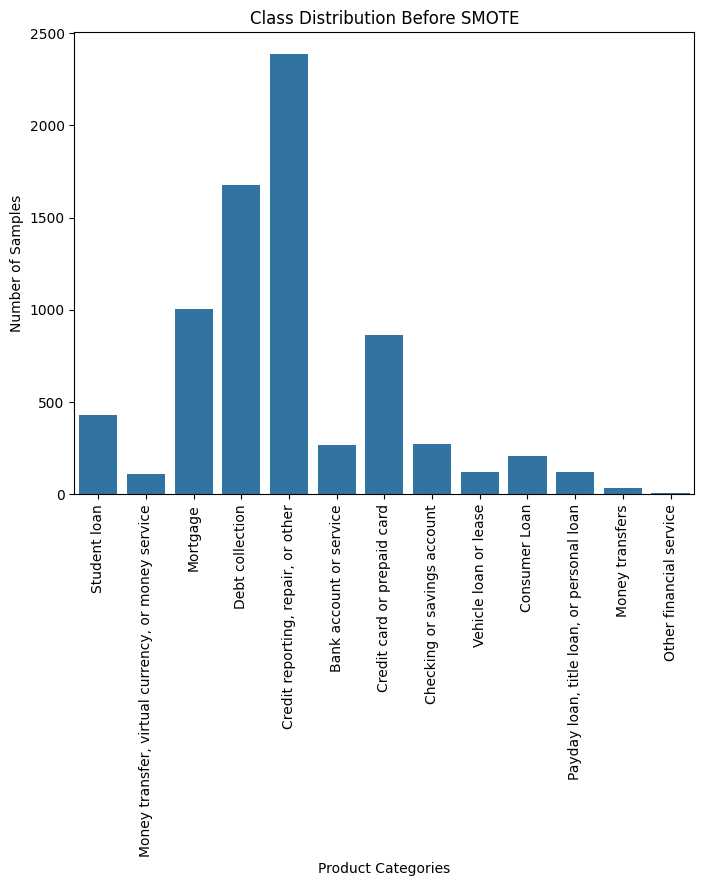

In [17]:
# Step 3: Visualize class distribution before SMOTE
plt.figure(figsize=(8,6))
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Product Categories")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)
plt.show()

In [18]:
# Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

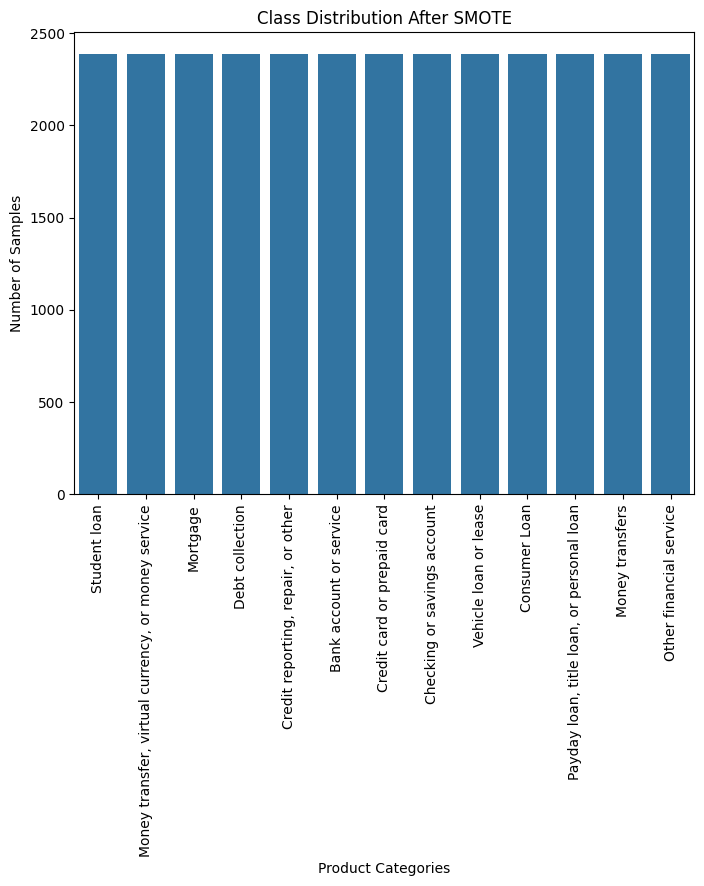

In [19]:
from imblearn.over_sampling import SMOTE

# Step 4: Apply SMOTE
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Step 5: Visualize class distribution after applying SMOTE
plt.figure(figsize=(8,6))
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Product Categories")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)
plt.show()

In [20]:
# Step 6: Check the new training size
print("Training size before SMOTE:", X_train_tfidf.shape[0])
print("Training size after SMOTE:", X_train_smote.shape[0])

Training size before SMOTE: 7500
Training size after SMOTE: 31018


<a id='m'></a>
### Models

## training without smote

In [24]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

## training with smote

In [25]:
# Models to train
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df1 = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    # Use the resampled data from SMOTE: X_train_smote and y_train_smote
    accuracies = cross_val_score(model, X_train_smote, y_train_smote, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

# Create a DataFrame to store results
cv_df1 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

<a id='sum'></a>
## Comparison of model performance

The best mean acuracy was obtained with LinearSVC.

## before SMOTE

In [26]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.7791,0.005561
LogisticRegression,0.7638,0.009543
MultinomialNB,0.6475,0.004596
RandomForestClassifier,0.3949,0.006665


## After SMOTE

In [27]:
mean_accuracy = cv_df1.groupby('model_name').accuracy.mean()
std_accuracy = cv_df1.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.977304,0.005568
LogisticRegression,0.965214,0.009350
MultinomialNB,0.950094,0.009509
RandomForestClassifier,0.781161,0.040480


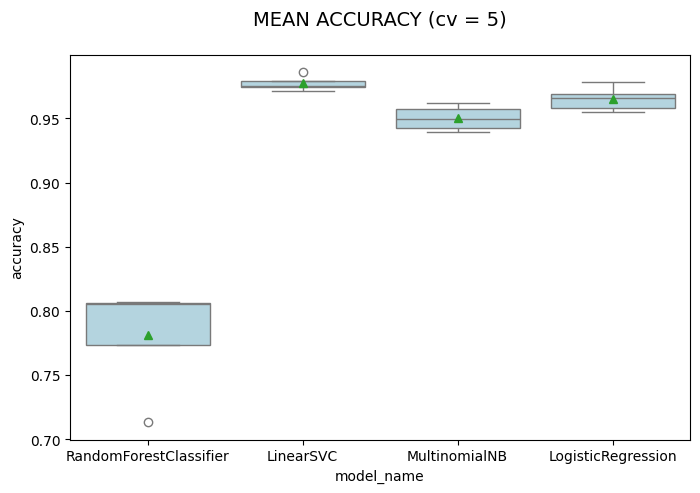

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy',
            data=cv_df1,
            color='lightblue',
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

<a id='ev'></a>
## Model Evaluation

In [23]:
%pip install -q dagshub mlflow


In [24]:

import dagshub
dagshub.init(repo_owner='molkaatrabelsii', repo_name='Text_classification', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=b82dd16d-b65f-45a1-b394-ecc81ef0737e&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=e6ecc4ac91c9a4cf92ef7cfd5fca5b9d46c0e4ace0127af5822e647927bfa315




Accessing as molkaatrabelsii

Initialized MLflow to track repo "molkaatrabelsii/Text_classification"

Repository molkaatrabelsii/Text_classification initialized!

In [25]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import mlflow
import mlflow.sklearn  # Required for logging sklearn models

# Ensure that X_train_smote and y_train_smote have the same number of samples
X_train_smote, y_train_smote = X_train_smote, y_train_smote  # Already resampled data after SMOTE

# Split the resampled data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_train_smote,
    y_train_smote,
    test_size=0.25,  # 25% for testing
    random_state=1
)

# Start an MLflow run
with mlflow.start_run():
    # Log experiment parameters
    mlflow.log_param("Model", "LinearSVC")
    mlflow.log_param("Test_Size", 0.25)
    mlflow.log_param("Random_State", 1)

    # Initialize the model
    model = LinearSVC()

    # Train the model on the resampled (SMOTE) training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Log metrics
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("Precision", report["weighted avg"]["precision"])
    mlflow.log_metric("Recall", report["weighted avg"]["recall"])
    mlflow.log_metric("F1-Score", report["weighted avg"]["f1-score"])

    # Log the model with input example and signature
    from mlflow.models import infer_signature
    signature = infer_signature(X_test, y_pred)
    mlflow.sklearn.log_model(model, "model", signature=signature, input_example=X_test[:5])

# Print performance metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


🏃 View run youthful-newt-772 at: https://dagshub.com/molkaatrabelsii/Text_classification.mlflow/#/experiments/0/runs/186a30594a3246e8bc7d34e9414e9f0a
🧪 View experiment at: https://dagshub.com/molkaatrabelsii/Text_classification.mlflow/#/experiments/0
Accuracy: 0.9742101869761445
Classification Report:
                                                     precision    recall  f1-score   support

                           Bank account or service       1.00      1.00      1.00       565
                       Checking or savings account       0.99      1.00      1.00       596
                                     Consumer Loan       0.99      1.00      0.99       608
                       Credit card or prepaid card       0.95      0.98      0.97       624
                Credit reporting, repair, or other       0.92      0.83      0.87       614
                                   Debt collection       0.89      0.88      0.89       636
Money transfer, virtual currency, or money service 

<a id='m'></a>
### Precision, Recall, F1-score

In [30]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred,
                                    target_names= df2['Product'].unique()))

				CLASSIFICATIION METRICS

                                                    precision    recall  f1-score   support

                Credit reporting, repair, or other       1.00      1.00      1.00       565
                                   Debt collection       0.99      1.00      1.00       596
                                     Consumer Loan       0.99      1.00      0.99       608
                       Credit card or prepaid card       0.95      0.98      0.97       624
                                          Mortgage       0.92      0.83      0.87       614
                             Vehicle loan or lease       0.89      0.88      0.89       636
                                      Student loan       1.00      1.00      1.00       582
         Payday loan, title loan, or personal loan       1.00      1.00      1.00       612
                       Checking or savings account       0.97      0.99      0.98       597
                           Bank account or service

It is possible to observe that the classes with more support (number of occurrences) tend to have a better f1-cscore. This is because the algorithm was trained with more data.<br><br>
The classes that can be classified with more precision are __‘Mortgage’__, __‘Credit reporting, repair, or other’__, and __‘Student loan’__.

<a id='cm'></a>
### Confusion Matrix

A Confusion Matrix is a table which rows represent the actual class and columns represents the predicted class.<br><br>
If we had a perfect model that always classifies correctly a new complaint, then the confusion matrix would have values in the diagonal only (where predicted label = actual label).

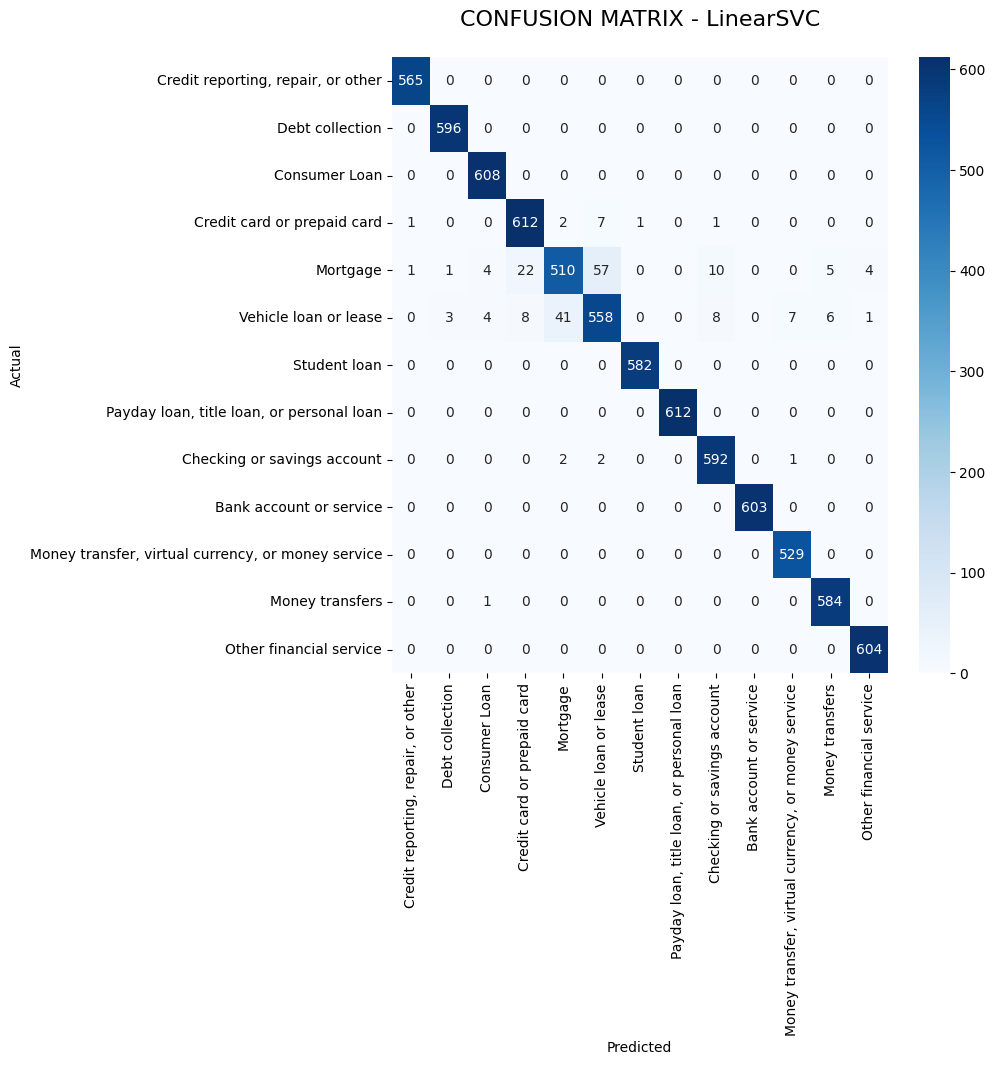

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values,
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16)
plt.show()

In general, the confusion matrix looks good (clear diagonal that represents correct classifications). Nevertheless, there are cases were the complaint was classified in a wrong class.

#### Misclassified complaints
Let’s have a look at the cases that were wrongly classified.

In [32]:
# Iterate through the confusion matrix to find misclassifications above the threshold
threshold = 20
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= threshold:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual],
                                                                 id_to_category[predicted],
                                                                 conf_mat[actual, predicted]))

            # Find indices where the true label is 'actual' and the predicted label is 'predicted'
            indices_test = np.where((y_test == actual) & (y_pred == predicted))[0]

            # Display the corresponding rows from df2
            display(df2.iloc[indices_test][['Product', 'Consumer_complaint']])
            print('')


'Mortgage' predicted as 'Credit card or prepaid card' : 22 examples.


,Product,Consumer_complaint



'Vehicle loan or lease' predicted as 'Mortgage' : 41 examples.


,Product,Consumer_complaint



'Mortgage' predicted as 'Vehicle loan or lease' : 57 examples.


,Product,Consumer_complaint


#### Most correlated terms with each category

In [33]:
# Assuming X_train_smote and y_train_smote are the SMOTE-resampled data
model.fit(X_train_smote, y_train_smote)

N = 4
for Product, category_id in sorted(category_to_id.items()):
    # Ensure category_id is within bounds of model coefficients
    if category_id < model.coef_.shape[0]:
        # Sort the coefficients for each category
        indices = np.argsort(model.coef_[category_id])

        # Ensure that indices are within the bounds of the feature names array
        feature_names = np.array(tfidf.get_feature_names_out())
        indices = indices[indices < len(feature_names)]

        # Get the feature names (unigrams and bigrams) after transforming
        feature_names = feature_names[indices]

        # Get the top N unigrams and bigrams
        unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
        bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]

        print("\n==> '{}':".format(Product))
        print("  * Top unigrams: %s" %(', '.join(unigrams)))
        print("  * Top bigrams: %s" %(', '.join(bigrams)))
    else:
        print(f"Category ID {category_id} is out of bounds for model coefficients.")



==> 'Bank account or service':
  * Top unigrams: cashiers, check, associate, payable
  * Top bigrams: stop payment, check payable, payment check, 59 00

==> 'Checking or savings account':
  * Top unigrams: mortgage, escrow, nationstar, modification
  * Top bigrams: mortgage xxxx, short sale, loan modification, home xxxx

==> 'Consumer Loan':
  * Top unigrams: car, furniture, loan, financing
  * Top bigrams: past xx, xx 2010, authorize credit, middle xxxx

==> 'Credit card or prepaid card':
  * Top unigrams: card, capital, citi, amex
  * Top bigrams: american express, use card, annual fee, 2018 30

==> 'Credit reporting, repair, or other':
  * Top unigrams: bank, suntrust, check, deposit
  * Top bigrams: xx 2016, overdraft protection, fargo xxxx, check account

==> 'Debt collection':
  * Top unigrams: bank, opening, transactions, cd
  * Top bigrams: xxxx 2017, account called, debit card, overdraft fees

==> 'Money transfer, virtual currency, or money service':
  * Top unigrams: loan, a

<a id='pred'></a>
## Predictions

Now let's make a few predictions on unseen data.<br>

Let's see what is the classification that our model gives to this new complaint.

In [26]:
new_complaint = """I have been enrolled back at XXXX XXXX University in the XX/XX/XXXX. Recently, i have been harassed by \
Navient for the last month. I have faxed in paperwork providing them with everything they needed. And yet I am still getting \
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late. At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the XX/XX/XXXX."""
print(model.predict(tfidf.transform([new_complaint])))

['Student loan']


The algorithm has classified this text as a "Student loan" complaint. Now let's look at the real label of this complaint.

In [38]:
df2[df2['Consumer_complaint'] == new_complaint]

,Product,Consumer_complaint,category_id
877489,Student loan,I have been enrolled back at XXXX XXXX Univers...,6


Our model was correct, the complaint was about **Student Loan**. Note that this customer has used terms with high TFIDF score, such us **Navient[](http://)**.<br><br>
Let's check another example.

In [39]:
new_complaint_2 = """Equifax exposed my personal information without my consent, as part of their recent data breach. \
In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \
off stock before the announcement."""
print(model.predict(tfidf.transform([new_complaint_2])))

['Credit reporting, repair, or other']


In [40]:
df2[df2['Consumer_complaint'] == new_complaint_2]

,Product,Consumer_complaint,category_id
420821,"Credit reporting, repair, or other",Equifax exposed my personal information withou...,0


Again, the algorithm correctly classified the caomplaint as __"Credit reporting, repair, or other"__. Note that this customer has used terms with high TFIDF score, such us __equifax, report__. <br><br>


# Save the model as pkl

In [ ]:
import pickle
# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

In [ ]:
import pickle

# Assuming `model` is your trained classification model
with open('/kaggle/working/model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as model.pkl in /kaggle/working/")


In [ ]:
# Using pickle
with open('/kaggle/working/model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test the loaded model (optional)
print("Loaded model:", loaded_model)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer with the same parameters as during training
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')

# New complaint for testing
new_complaint = """The student didn't take the money."""

tfidf.fit(X_train)

# Step 2: Transform the new complaint (this can be a single complaint)
transformed_complaint = tfidf.transform([new_complaint])

# Step 3: Predict the category using the loaded model
prediction = model.predict(transformed_complaint)

# Step 4: Output the prediction
print("Prediction:", prediction)


# Save the encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Assuming you used LabelEncoder to encode the labels
encoder = LabelEncoder()
encoder.fit(df2['Product'])  # Assuming 'Product' is your target variable

# Save the encoder
joblib.dump(encoder, 'encoder.pkl')


In [ ]:
import joblib

# Load the encoder that was saved during training
encoder = joblib.load('encoder.pkl')

# Test data (categories as they were before encoding)
test_labels = ["Debt collection", "Consumer Loan", "Credit card or prepaid card"]

# Encode the test labels
encoded_labels = encoder.transform(test_labels)
print(f"Encoded Labels: {encoded_labels}")

# Decode back to original categories
decoded_labels = encoder.inverse_transform(encoded_labels)
print(f"Decoded Labels: {decoded_labels}")


In [ ]:
from dagshub import get_repo_bucket_client
# Get a boto3.client object
s3 = get_repo_bucket_client("molkaatrabelsii/Text_classification")

# Upload file
s3.upload_file(
    Bucket="Text_classification",  # name of the repo
    Filename="local.csv",  # local path of file to upload
    Key="remote.csv",  # remote path where to upload the file
)
# Download file
s3.download_file(
    Bucket="Text_classification",  # name of the repo
    Key="remote.csv",  #  remote path from where to download the file
    Filename="local.csv",  # local path where to download the file
)

In [27]:
from dagshub import get_repo_bucket_client

# Connect to your DagsHub repo
s3 = get_repo_bucket_client("molkaatrabelsii/Text_classification")

# Path of your dataset
local_file_path = "/content/rows.csv"
remote_file_path = "data/rows.csv"  # Adjust this remote path as desired

# Upload the file to the DagsHub bucket
s3.upload_file(
    Bucket="Text_classification",  # Name of your repo
    Filename=local_file_path,  # Local file to upload
    Key=remote_file_path,  # Path in the DagsHub repo
)

# Download the file from the DagsHub bucket
s3.download_file(
    Bucket="Text_classification",  # Name of your repo
    Key=remote_file_path,  # Path in the DagsHub repo
    Filename="rows_downloaded.csv",  # Local path to save the downloaded file
)


Client created. Use the name of the repo (Text_classification) as the name of the bucket